## TMC Exercise

This is the scratch paper and quick codebase for the TMC exercise

In [33]:
## import the packages and the flat file

import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import importlib
importlib.reload(plt); importlib.reload(sns)
np.random.seed(123)


## quick glance at the training data
training_data = pd.read_csv("exercise_data.csv")
training_data.head()

,Campaign_Name,Campaign_Type,Start_Date,Length,Attendees,Num_Responses,Response_Rate,Strongly_Agree,PoCI_Strongly_Agree,Non_PoCI_Strongly_Agree,Adjunct_Trainer,CampaignID,OwnerID,Trainer,TrainerID,TrainerPoCI,Trainer_Race,Trainer_Gender,Staff_Start_Date
0,"2-Day Crash Course April 16-17, 2019 (DC)",Crash Course,4/16/19,Two days,42,33,78.57,69.70,75.0,66.67,Gen,7010G0000013g1Q,003F000001akKO3IAM,Progressive Adjunct,003F000001akKO3IAM,NaN,NaN,NaN,NaN
1,"2-Day Crash Course April 16-17, 2019 (PORT)",Crash Course,4/16/19,Two days,32,28,87.50,71.43,80.0,69.57,Derek,7010G0000013g1V,003F000001akKO3IAM,Progressive Adjunct,003F000001akKO3IAM,NaN,NaN,NaN,NaN
2,"2-Day Crash Course April 2-3, 2019 (CHI)",Crash Course,4/2/19,Two days,23,16,69.57,81.25,80.0,81.82,Gayle,7010G0000013g0S,003F000001akKO3IAM,Progressive Adjunct,003F000001akKO3IAM,NaN,NaN,NaN,NaN
3,"2-Day Crash Course April 23-24, 2019 (DC)",Crash Course,4/23/19,Two days,37,37,100.00,75.68,87.5,66.67,NaN,7012I000001Eatw,003F000002OgaYpIAJ,Janet,003F000002OgaYpIAJ,N,White,F,9/1/16
4,"2-Day Crash Course April 24-25, 2019 (BOS)",Crash Course,4/24/19,Two days,30,21,70.00,61.90,50.0,63.16,Chris,7010G0000013g1a,003F000001akKO3IAM,Progressive Adjunct,003F000001akKO3IAM,NaN,NaN,NaN,NaN


In [34]:



too_high  = training_data[training_data["Response_Rate"]>100].index
 
# Delete these row indexes from dataFrame
training_data_rr = training_data.drop(too_high)

zero_attendees  = training_data_rr[training_data_rr["Response_Rate"]==0].index
 
training_data_rr = training_data_rr.drop(zero_attendees)



training_data_rr.head()

,Campaign_Name,Campaign_Type,Start_Date,Length,Attendees,Num_Responses,Response_Rate,Strongly_Agree,PoCI_Strongly_Agree,Non_PoCI_Strongly_Agree,Adjunct_Trainer,CampaignID,OwnerID,Trainer,TrainerID,TrainerPoCI,Trainer_Race,Trainer_Gender,Staff_Start_Date
0,"2-Day Crash Course April 16-17, 2019 (DC)",Crash Course,4/16/19,Two days,42,33,78.57,69.70,75.0,66.67,Gen,7010G0000013g1Q,003F000001akKO3IAM,Progressive Adjunct,003F000001akKO3IAM,NaN,NaN,NaN,NaN
1,"2-Day Crash Course April 16-17, 2019 (PORT)",Crash Course,4/16/19,Two days,32,28,87.50,71.43,80.0,69.57,Derek,7010G0000013g1V,003F000001akKO3IAM,Progressive Adjunct,003F000001akKO3IAM,NaN,NaN,NaN,NaN
2,"2-Day Crash Course April 2-3, 2019 (CHI)",Crash Course,4/2/19,Two days,23,16,69.57,81.25,80.0,81.82,Gayle,7010G0000013g0S,003F000001akKO3IAM,Progressive Adjunct,003F000001akKO3IAM,NaN,NaN,NaN,NaN
3,"2-Day Crash Course April 23-24, 2019 (DC)",Crash Course,4/23/19,Two days,37,37,100.00,75.68,87.5,66.67,NaN,7012I000001Eatw,003F000002OgaYpIAJ,Janet,003F000002OgaYpIAJ,N,White,F,9/1/16
4,"2-Day Crash Course April 24-25, 2019 (BOS)",Crash Course,4/24/19,Two days,30,21,70.00,61.90,50.0,63.16,Chris,7010G0000013g1a,003F000001akKO3IAM,Progressive Adjunct,003F000001akKO3IAM,NaN,NaN,NaN,NaN


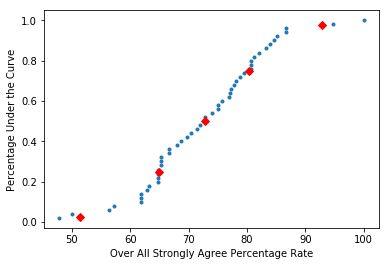

In [35]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers

ptiles_pers = np.percentile(training_data_rr.Strongly_Agree, percentiles)

x_val, y_val = ecdf(training_data_rr.Strongly_Agree)

plt.plot(x_val, y_val,marker='.', linestyle='none')
plt.plot(ptiles_pers, percentiles/100, marker='D', color='red',
         linestyle='none')

plt.xlabel('Over All Strongly Agree Percentage Rate')
plt.ylabel('Percentage Under the Curve')
plt.savefig('ecdf_agree_1.png', format='png', dpi=600)
plt.show()

In [36]:
ptiles_pers

array([51.44225, 64.8375 , 72.73   , 80.43   , 92.92425])

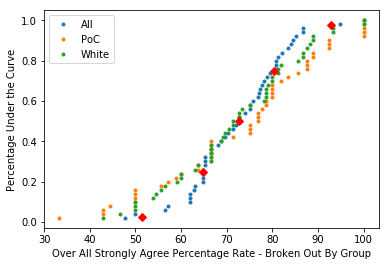

In [37]:
## ploting out the groups
x_val, y_val = ecdf(training_data_rr.Strongly_Agree)
pocx_val, pocy_val = ecdf(training_data_rr.PoCI_Strongly_Agree)
nonx_val, nony_val = ecdf(training_data_rr.Non_PoCI_Strongly_Agree)

plt.plot(x_val, y_val,marker='.', linestyle='none')
plt.plot(pocx_val, pocy_val,marker='.', linestyle='none')
plt.plot(nonx_val, nony_val,marker='.', linestyle='none')

plt.plot(ptiles_pers, percentiles/100, marker='D', color='red',
         linestyle='none')

plt.xlabel('Over All Strongly Agree Percentage Rate - Broken Out By Group')
plt.ylabel('Percentage Under the Curve')
plt.legend(['All', "PoC", "White"],  loc='upper left')
plt.savefig('ecdf_agree_error.png', format='png', dpi=600)
plt.show()

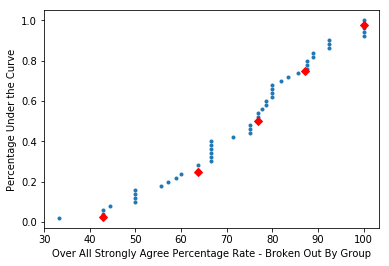

In [38]:
## ploting out the groups
pocptiles_pers = np.percentile(training_data_rr.PoCI_Strongly_Agree, percentiles)


pocx_val, pocy_val = ecdf(training_data_rr.PoCI_Strongly_Agree)

#plt.plot(x_val, y_val,marker='.', linestyle='none')
plt.plot(pocx_val, pocy_val,marker='.', linestyle='none')
#plt.plot(nonx_val, nony_val,marker='.', linestyle='none')

plt.plot(pocptiles_pers, percentiles/100, marker='D', color='red',
         linestyle='none')

plt.xlabel('Over All Strongly Agree Percentage Rate - Broken Out By Group')
plt.ylabel('Percentage Under the Curve')
#plt.legend('APN',  loc='upper left')
plt.savefig('ecdf_justpoc.png', format='png', dpi=600)
plt.show()

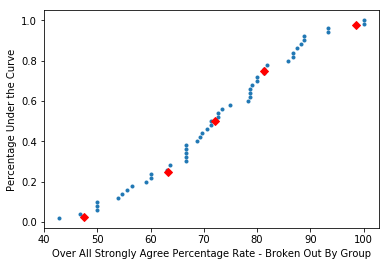

In [39]:
## ploting out the groups
Non_pocptiles_pers = np.percentile(training_data_rr.Non_PoCI_Strongly_Agree, percentiles)


Non_pocx_val, Non_pocy_val = ecdf(training_data_rr.Non_PoCI_Strongly_Agree)

#plt.plot(x_val, y_val,marker='.', linestyle='none')
plt.plot(Non_pocx_val, Non_pocy_val,marker='.', linestyle='none')
#plt.plot(nonx_val, nony_val,marker='.', linestyle='none')

plt.plot(Non_pocptiles_pers, percentiles/100, marker='D', color='red',
         linestyle='none')

plt.xlabel('Over All Strongly Agree Percentage Rate - Broken Out By Group')
plt.ylabel('Percentage Under the Curve')
#plt.legend('APN',  loc='upper left')
plt.savefig('ecdf_Non_poc.png', format='png', dpi=600)
plt.show()

In [40]:
print("Percentage of People of Color 'Strongly Agree' that they can implement the training tools: ", round(training_data_rr.PoCI_Strongly_Agree.mean(), 2))
print("Percentage Non-PoC: ", round(training_data_rr.Non_PoCI_Strongly_Agree.mean(), 2))
#training_data_rr.PoCI_Strongly_Agree.mean()

Percentage of People of Color 'Strongly Agree' that they can implement the training tools:  73.45
Percentage Non-PoC:  72.21


In [41]:
 stats.ttest_ind(training_data_rr.PoCI_Strongly_Agree, training_data_rr.Non_PoCI_Strongly_Agree, equal_var = False)

Ttest_indResult(statistic=0.39695651142350663, pvalue=0.6922944917835512)

With a P-value that high we can't really make any inferences about the data with it. But Let's break it out by trainer racial demographics.

In [42]:

Trainer_poc  = training_data_rr[training_data_rr["TrainerPoCI"] != "Y"].index
 
# Delete these row indexes from dataFrame
training_data_poc = training_data_rr.drop(Trainer_poc)

Trainer_nonpoc  = training_data_rr[training_data_rr["TrainerPoCI"] != "N"].index
 
# Delete these row indexes from dataFrame
training_data_npoc = training_data_rr.drop(Trainer_nonpoc)


print("Percentage of People of Color 'Strongly Agree' that they can implement the tools *when the trainer is white*: ", round(training_data_npoc.PoCI_Strongly_Agree.mean(), 2))
print("Percentage when the trainer is a Person of Color: ", round(training_data_poc.PoCI_Strongly_Agree.mean(), 2))
#training_data_rr.PoCI_Strongly_Agree.mean()


Percentage of People of Color 'Strongly Agree' that they can implement the tools *when the trainer is white*:  69.83
Percentage when the trainer is a Person of Color:  74.86


This is more interesting since it's a 5% difference. Meanwhile the average is less different for white attendees, who feel slightly more than 1% more confident with a white trainer. 

In [43]:

print("Percentage of white attendees 'Strongly Agree' that they can implement the tools *when the trainer is white*: ", round(training_data_npoc.Non_PoCI_Strongly_Agree.mean(), 2))
print("Percentage when the trainer is a Person of Color: ", round(training_data_poc.Non_PoCI_Strongly_Agree.mean(), 2))
#training_data_rr.PoCI_Strongly_Agree.mean()



Percentage of white attendees 'Strongly Agree' that they can implement the tools *when the trainer is white*:  74.14
Percentage when the trainer is a Person of Color:  72.93


Let's run a T-Test for both of these to see if they're significant.

In [44]:
 stats.ttest_ind(training_data_npoc.PoCI_Strongly_Agree, training_data_poc.PoCI_Strongly_Agree)

Ttest_indResult(statistic=-0.7701861256300421, pvalue=0.44741858876209206)

In [45]:
 stats.ttest_ind(training_data_npoc.Non_PoCI_Strongly_Agree, training_data_poc.Non_PoCI_Strongly_Agree)

Ttest_indResult(statistic=0.2821311107361569, pvalue=0.7798467223091042)

In [46]:
## just looking at data for the white trainers for both groups
stats.ttest_ind(training_data_npoc.PoCI_Strongly_Agree, training_data_npoc.Non_PoCI_Strongly_Agree)

Ttest_indResult(statistic=-0.8147093893352666, pvalue=0.4212608017301601)

Interestingly we again see a low test value and a high p-value, so we can't conclusively reject the null hypothesis, but that doesn't mean we should ignore the outcomes. 

In [47]:
 stats.ttest_ind(training_data_poc.PoCI_Strongly_Agree, training_data_poc.Non_PoCI_Strongly_Agree)

Ttest_indResult(statistic=0.33652353790680983, pvalue=0.7391772174340755)

Let's chart some of the results, for visual snap shots.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


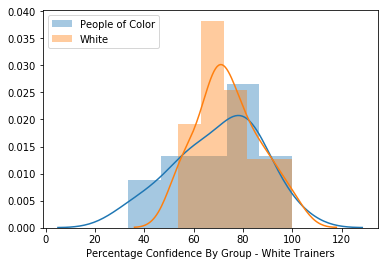

In [48]:

sns.distplot(training_data_npoc.PoCI_Strongly_Agree)
sns.distplot(training_data_npoc.Non_PoCI_Strongly_Agree)
plt.xlabel('Percentage Confidence By Group - White Trainers')
plt.legend(['People of Color', "White"], loc='upper left')
plt.savefig('per_conf_whitetrain.png', format='png', dpi=600)
plt.show()


In [49]:
training_data_npoc.head()

,Campaign_Name,Campaign_Type,Start_Date,Length,Attendees,Num_Responses,Response_Rate,Strongly_Agree,PoCI_Strongly_Agree,Non_PoCI_Strongly_Agree,Adjunct_Trainer,CampaignID,OwnerID,Trainer,TrainerID,TrainerPoCI,Trainer_Race,Trainer_Gender,Staff_Start_Date
3,"2-Day Crash Course April 23-24, 2019 (DC)",Crash Course,4/23/19,Two days,37,37,100.00,75.68,87.50,66.67,NaN,7012I000001Eatw,003F000002OgaYpIAJ,Janet,003F000002OgaYpIAJ,N,White,F,9/1/16
7,"2-Day Crash Course April 29-30, 2019 (NYC)",Crash Course,4/29/19,Two days,24,19,79.17,63.16,83.33,53.85,NaN,7010G0000013g1z,003F000001zkPOTIAM,Michael,003F000001zkPOTIAM,N,White,M,1/1/15
9,"2-Day Crash Course April 3-4, 2019 (DC)",Crash Course,4/3/19,Two days,40,19,47.50,94.74,100.00,93.33,NaN,7012I000001EYpT,0030D00002UPHqteBR,Vicky,0030D00002UPHqteBR,N,White,F,3/1/11
10,"2-Day Crash Course April 9-10, 2019 (SF)",Crash Course,4/9/19,Two days,25,17,68.00,64.71,60.00,66.67,NaN,7010G0000013g0r,003F000002OgaYpIAJ,Janet,003F000002OgaYpIAJ,N,White,F,9/1/16
13,"2-Day Crash Course February 25-26, 2019 (DC)",Crash Course,2/25/19,Two days,41,35,85.37,62.86,77.78,59.09,NaN,7010G0000013fqS,003F000002OgaYpIAJ,Janet,003F000002OgaYpIAJ,N,White,F,9/1/16


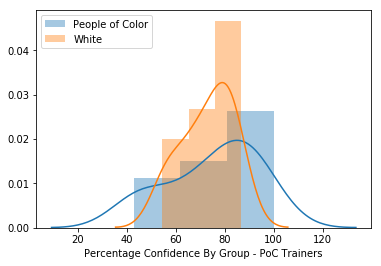

In [50]:

sns.distplot(training_data_poc.PoCI_Strongly_Agree)
sns.distplot(training_data_poc.Non_PoCI_Strongly_Agree)
plt.xlabel('Percentage Confidence By Group - PoC Trainers')
plt.legend(['People of Color', "White"], loc='upper left')
plt.savefig('per_conf_poctrain.png', format='png', dpi=600)
plt.show()



In [51]:
training_data_npoc.Non_PoCI_Strongly_Agree.mean()

74.14411764705882

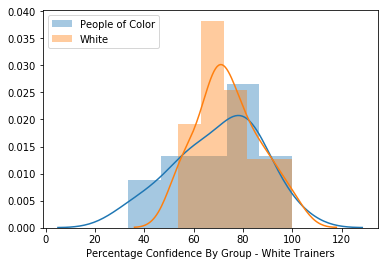

In [52]:

sns.distplot(training_data_npoc.PoCI_Strongly_Agree)
sns.distplot(training_data_npoc.Non_PoCI_Strongly_Agree)
plt.xlabel('Percentage Confidence By Group - White Trainers')
plt.legend(['People of Color', "White"], loc='upper left')
plt.savefig('per_conf_poctrain.png', format='png', dpi=600)
plt.show()



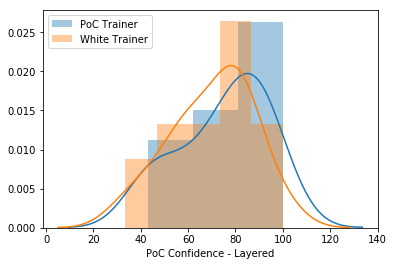

In [53]:

sns.distplot(training_data_poc.PoCI_Strongly_Agree)
sns.distplot(training_data_npoc.PoCI_Strongly_Agree)
plt.xlabel('PoC Confidence - Layered')
plt.legend(['PoC Trainer', "White Trainer"], loc='upper left')
plt.savefig('poc_conf_poctrain.png', format='png', dpi=600)
plt.show()



# Analyzing the trainers who have longevity

In [63]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

two_yrs_ago = datetime.now() - relativedelta(years=2)
type(two_yrs_ago)
training_data_rr["Staff_Start_Date"] = pd.to_datetime(training_data_rr["Staff_Start_Date"])


In [64]:
new_staff = training_data_rr[training_data_rr["Staff_Start_Date"]> two_yrs_ago].index
old_staff = training_data_rr[training_data_rr["Staff_Start_Date"]<= two_yrs_ago].index



In [65]:
old_staff_data_rr = training_data_rr.drop(new_staff)
old_staff_data_rr.dropna(subset=["Staff_Start_Date"], inplace=True)
old_staff_data_rr.head()

,Campaign_Name,Campaign_Type,Start_Date,Length,Attendees,Num_Responses,Response_Rate,Strongly_Agree,PoCI_Strongly_Agree,Non_PoCI_Strongly_Agree,Adjunct_Trainer,CampaignID,OwnerID,Trainer,TrainerID,TrainerPoCI,Trainer_Race,Trainer_Gender,Staff_Start_Date
3,"2-Day Crash Course April 23-24, 2019 (DC)",Crash Course,4/23/19,Two days,37,37,100.00,75.68,87.50,66.67,NaN,7012I000001Eatw,003F000002OgaYpIAJ,Janet,003F000002OgaYpIAJ,N,White,F,2016-09-01
6,"2-Day Crash Course April 29-30, 2019 (DC)",Crash Course,4/29/19,Two days,41,34,82.93,64.71,88.89,54.55,NaN,7010G0000013g1k,0030G00002UHbgtQAH,Antonio,0030G00002UHbgtQAH,Y,Latinx,M,2016-11-01
7,"2-Day Crash Course April 29-30, 2019 (NYC)",Crash Course,4/29/19,Two days,24,19,79.17,63.16,83.33,53.85,NaN,7010G0000013g1z,003F000001zkPOTIAM,Michael,003F000001zkPOTIAM,N,White,M,2015-01-01
9,"2-Day Crash Course April 3-4, 2019 (DC)",Crash Course,4/3/19,Two days,40,19,47.50,94.74,100.00,93.33,NaN,7012I000001EYpT,0030D00002UPHqteBR,Vicky,0030D00002UPHqteBR,N,White,F,2011-03-01
10,"2-Day Crash Course April 9-10, 2019 (SF)",Crash Course,4/9/19,Two days,25,17,68.00,64.71,60.00,66.67,NaN,7010G0000013g0r,003F000002OgaYpIAJ,Janet,003F000002OgaYpIAJ,N,White,F,2016-09-01


In [66]:
new_staff_data_rr = training_data_rr.drop(old_staff)
new_staff_data_rr.dropna(subset=["Staff_Start_Date"], inplace=True)
new_staff_data_rr.head()

,Campaign_Name,Campaign_Type,Start_Date,Length,Attendees,Num_Responses,Response_Rate,Strongly_Agree,PoCI_Strongly_Agree,Non_PoCI_Strongly_Agree,Adjunct_Trainer,CampaignID,OwnerID,Trainer,TrainerID,TrainerPoCI,Trainer_Race,Trainer_Gender,Staff_Start_Date
8,"2-Day Crash Course April 29-30, 2019 (SF)",Crash Course,4/29/19,Two days,29,28,96.55,75.00,81.82,68.75,NaN,7012I000001EgHW,0030G00002UPHqtABC,Tahani,0030G00002UPHqtABC,Y,AAPI,F,2018-09-01
11,"2-Day Crash Course February 20-21, 2019 (NYC)",Crash Course,2/20/19,Two days,28,25,89.29,72.00,75.00,69.23,NaN,7010G0000013fpe,003F000002OgaYpIAI,Chidi,003F000002OgaYpIAI,Y,African American,M,2018-07-01
16,"2-Day Crash Course February 28 - March 1, 2019...",Crash Course,2/28/19,Two days,24,21,87.50,61.90,63.64,60.00,NaN,7012I000001J9Hm,003F000002OgaYpIAI,Chidi,003F000002OgaYpIAI,Y,African American,M,2018-07-01
20,"2-Day Crash Course February 5-6, 2019 (NYC)",Crash Course,2/5/19,Two days,28,26,92.86,80.77,42.86,86.67,NaN,7010G0000013fo2,0030D00037UPHqtiUd,Gen,0030D00037UPHqtiUd,Y,African American,F,2019-06-01
22,"2-Day Crash Course July 1-2, 2019 (NYC)",Crash Course,7/1/19,Two days,30,30,100.00,86.67,92.31,81.25,NaN,7012I00000170h3,0030D00037UPHqtiUd,Gen,0030D00037UPHqtiUd,Y,African American,F,2019-06-01


In [67]:
 stats.ttest_ind(old_staff_data_rr.PoCI_Strongly_Agree, old_staff_data_rr.Non_PoCI_Strongly_Agree)

Ttest_indResult(statistic=-0.1936923308303854, pvalue=0.8475693534555107)

In [68]:
print(old_staff_data_rr.PoCI_Strongly_Agree.mean())
print(old_staff_data_rr.Non_PoCI_Strongly_Agree.mean())

71.81388888888888
72.81666666666666


In [69]:
 stats.ttest_ind(new_staff_data_rr.PoCI_Strongly_Agree, new_staff_data_rr.Non_PoCI_Strongly_Agree)

Ttest_indResult(statistic=-0.3642644733204668, pvalue=0.7188502640270877)

In [70]:
print(new_staff_data_rr.PoCI_Strongly_Agree.mean())
print(new_staff_data_rr.Non_PoCI_Strongly_Agree.mean())

72.4976923076923
74.67846153846155


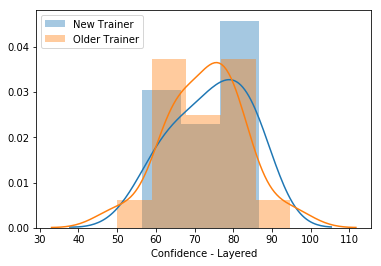

In [72]:

sns.distplot(new_staff_data_rr.Strongly_Agree)
sns.distplot(old_staff_data_rr.Strongly_Agree)
plt.xlabel('Confidence - Layered')
plt.legend(['New Trainer', "Older Trainer"], loc='upper left')
plt.savefig('new_staff_conf_poctrain.png', format='png', dpi=600)
plt.show()